In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

# 2015 tree census data

In [2]:
# Load data

districts = gpd.read_file('../data/shapefiles/nycd_22a/nycd.shp')
# source: https://www1.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page

trees_1 = pd.read_csv('../data/tree_census/clean_tree_census2015_PART1.csv')
trees_2 = pd.read_csv('../data/tree_census/clean_tree_census2015_PART2.csv')
trees_1.drop(columns=['Unnamed: 0'], inplace=True)
trees_2.drop(columns=['Unnamed: 0'], inplace=True)
trees = pd.concat([trees_1, trees_2], ignore_index=True)

In [4]:
trees_1.columns

Index(['year', 'tree_diameter', 'Diameter_of_Stump_Measured', 'tree_status',
       'tree_health_subjective', 'spc_latin', 'spc_common', 'sidw_damage',
       'User_Type', 'Is_Root_Stone_Present', 'Is_Root_Gate_Present',
       'Is_Root_Other_Present', 'Is_Trunk_Wire_Present',
       'Is_Trunk_Light_Present', 'Is_Trunk_Other_Present',
       'Is_Branch_Light_Present', 'Is_Branch_Sneaker_Present',
       'Is_Branch_Other_Present', 'est_address', 'zip_code', 'borough',
       'council_district', 'nta_name', 'census_tract_7dig', 'latitude',
       'longitude', 'borough_name', 'alive'],
      dtype='object')

In [5]:
trees_1['tree_status'].value_counts()

Alive    265962
Stump      7580
Dead       6193
Name: tree_status, dtype: int64

## Trees EDA

In [35]:
# Note that species is not noted when tree is dead
trees[trees['alive'] == 0][['spc_latin']].value_counts()

spc_latin                         
None                                  26303
Gleditsia triacanthos var. inermis        1
dtype: int64

In [36]:
# Are there any trees for which we don't have a diameter OR a stump diameter?
trees[(trees['tree_diameter'] == 0) & (trees['Diameter_of_Stump_Measured'] == 0)]

,year,tree_diameter,Diameter_of_Stump_Measured,tree_status,tree_health_subjective,spc_latin,spc_common,sidw_damage,User_Type,Is_Root_Stone_Present,...,zip_code,borough,council_district,nta_name,census_tract_7dig,latitude,longitude,borough_name,alive,geometry
57,2015,0,0,Dead,None,None,None,None,Volunteer,False,...,10458,2,11,Norwood,2042500,40.871927,-73.882349,Bronx,0,POINT (1016788.349 256965.966)
645,2015,0,0,Dead,None,None,None,None,Volunteer,False,...,10458,2,15,Belmont,2038700,40.857876,-73.887850,Bronx,0,POINT (1015273.312 251844.717)
3659,2015,0,0,Dead,None,None,None,None,Volunteer,False,...,10028,1,5,Yorkville,1013600,40.773569,-73.949697,Manhattan,0,POINT (998182.706 221112.669)
6049,2015,0,0,Dead,None,None,None,None,Volunteer,False,...,10458,2,11,Norwood,2042500,40.871095,-73.882113,Bronx,0,POINT (1016853.990 256662.997)
18423,2015,0,0,Dead,None,None,None,None,Volunteer,False,...,10021,1,4,Lenox Hill-Roosevelt Island,1012600,40.768716,-73.960425,Manhattan,0,POINT (995212.186 219343.385)
31732,2015,0,0,Dead,None,None,None,None,Volunteer,False,...,11214,3,43,Gravesend,3031400,40.589826,-73.988325,Brooklyn,0,POINT (987492.570 154166.058)
41648,2015,0,0,Dead,None,None,None,None,Volunteer,False,...,10026,1,9,Central Harlem South,1020102,40.805552,-73.957829,Manhattan,0,POINT (995924.804 232764.211)
45991,2015,0,0,Dead,None,None,None,None,Volunteer,False,...,10028,1,5,Yorkville,1013600,40.773431,-73.947397,Manhattan,0,POINT (998819.621 221062.951)
100937,2015,0,0,Dead,None,None,None,None,Volunteer,False,...,10065,1,5,Lenox Hill-Roosevelt Island,1010602,40.760855,-73.958978,Manhattan,0,POINT (995614.214 216479.260)
119658,2015,0,0,Dead,None,None,None,None,TreesCount Staff,False,...,10307,5,51,Charleston-Richmond Valley-Tottenville,5024402,40.503069,-74.237430,Staten Island,0,POINT (918220.954 122647.879)


### Examine community districts shapefile

In [6]:
districts.head()

,BoroCD,Shape_Leng,Shape_Area,geometry
0,206,35875.711733,4.266431e+07,"POLYGON ((1019707.979 246708.141, 1019688.550 ..."
1,404,37018.373839,6.573966e+07,"POLYGON ((1026508.290 208553.862, 1026368.569 ..."
2,304,37007.806599,5.666261e+07,"POLYGON ((1012965.523 187886.949, 1012949.003 ..."
3,205,29443.048129,3.831698e+07,"POLYGON ((1014295.119 253236.989, 1014284.683 ..."
4,207,44812.147426,5.331169e+07,"POLYGON ((1018768.756 256840.862, 1018491.628 ..."


In [6]:
# Add borough column
districts['borough'] = districts['BoroCD'].map(lambda x: int(str(x)[0]))

In [7]:
# Check projection of districts file
districts.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

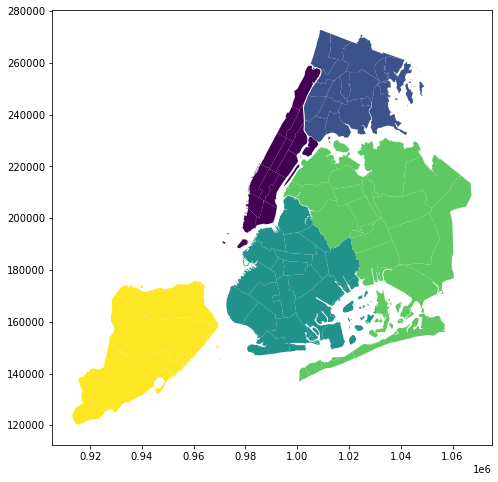

In [9]:
# Plot
fig, ax = plt.subplots(figsize=(8,8))
districts.plot(ax=ax, column = 'borough')
# color code 

In [10]:
# Check how many CDs are listed per borough

districts[['borough','BoroCD']].groupby('borough').count()

,BoroCD
borough,
1,13
2,15
3,20
4,19
5,4


In [11]:
districts[districts['borough'] == 3].sort_values('BoroCD')

,BoroCD,Shape_Leng,Shape_Area,geometry,borough
46,301,68935.801518,1.317033e+08,"POLYGON ((1005302.497 199455.730, 1005307.792 ...",3
61,302,74179.909370,7.932946e+07,"POLYGON ((992763.566 196891.144, 993014.133 19...",3
7,303,36213.671264,7.946150e+07,"POLYGON ((1006978.609 189657.381, 1006991.773 ...",3
2,304,37007.806599,5.666261e+07,"POLYGON ((1012965.523 187886.949, 1012949.003 ...",3
32,305,65110.852791,1.554837e+08,"POLYGON ((1020741.588 192413.164, 1020664.503 ...",3
62,306,82155.681306,8.550156e+07,"POLYGON ((983766.472 191538.898, 983778.598 19...",3
58,307,87448.696583,1.041268e+08,"POLYGON ((989751.236 180153.483, 989741.619 18...",3
18,308,38232.887521,4.560379e+07,"POLYGON ((995818.280 186959.985, 996465.612 18...",3
11,309,29932.858949,4.531542e+07,"POLYGON ((1004024.533 181378.093, 1003932.939 ...",3
39,310,44791.269286,1.113457e+08,"POLYGON ((975283.303 173918.884, 975366.896 17...",3


In [10]:
# Bring in dictionary of district names from air quality data
# Note that districts not in this list (i.e. parks) will be labaled NaN in new column

cd_dict = {503: 'Tottenville and Great Kills (CD3)',
     502: 'South Beach and Willowbrook (CD2)',
     501: 'St. George and Stapleton (CD1)',
     414: 'Rockaway and Broad Channel (CD14)',
     413: 'Queens Village (CD13)',
     412: 'Jamaica and Hollis (CD12)',
     411: 'Bayside and Little Neck (CD11)',
     410: 'South Ozone Park and Howard Beach (CD10)',
     409: 'Kew Gardens and Woodhaven (CD9)',
     408: 'Hillcrest and Fresh Meadows (CD8)',
     407: 'Flushing and Whitestone (CD7)',
     406: 'Rego Park and Forest Hills (CD6)',
     405: 'Ridgewood and Maspeth (CD5)',
     404: 'Elmhurst and Corona (CD4)',
     403: 'Jackson Heights (CD3)',
     402: 'Woodside and Sunnyside (CD2)',
     401: 'Long Island City and Astoria (CD1)',
     318: 'Flatlands and Canarsie (CD18)',
     317: 'East Flatbush (CD17)',
     316: 'Brownsville (CD16)',
     315: 'Sheepshead Bay (CD15)',
     314: 'Flatbush and Midwood (CD14)',
     313: 'Coney Island (CD13)',
     312: 'Borough Park (CD12)',
     311: 'Bensonhurst (CD11)',
     310: 'Bay Ridge and Dyker Heights (CD10)',
     309: 'South Crown Heights and Lefferts Gardens (CD9)',
     308: 'Crown Heights and Prospect Heights (CD8)',
     307: 'Sunset Park (CD7)',
     306: 'Park Slope and Carroll Gardens (CD6)',
     305: 'East New York and Starrett City (CD5)',
     304: 'Bushwick (CD4)',
     303: 'Bedford Stuyvesant (CD3)',
     302: 'Fort Greene and Brooklyn Heights (CD2)',
     301: 'Greenpoint and Williamsburg (CD1)',
     212: 'Williamsbridge and Baychester (CD12)',
     211: 'Morris Park and Bronxdale (CD11)',
     210: 'Throgs Neck and Co-op City (CD10)',
     209: 'Parkchester and Soundview (CD9)',
     208: 'Riverdale and Fieldston (CD8)',
     207: 'Kingsbridge Heights and Bedford (CD7)',
     206: 'Belmont and East Tremont (CD6)',
     205: 'Fordham and University Heights (CD5)',
     204: 'Highbridge and Concourse (CD4)',
     203: 'Morrisania and Crotona (CD3)',
     202: 'Hunts Point and Longwood (CD2)',
     201: 'Mott Haven and Melrose (CD1)',
     112: 'Washington Heights and Inwood (CD12)',
     111: 'East Harlem (CD11)',
     110: 'Central Harlem (CD10)',
     109: 'Morningside Heights and Hamilton Heights (CD9)',
     108: 'Upper East Side (CD8)',
     107: 'Upper West Side (CD7)',
     106: 'Stuyvesant Town and Turtle Bay (CD6)',
     105: 'Midtown (CD5)',
     104: 'Clinton and Chelsea (CD4)',
     103: 'Lower East Side and Chinatown (CD3)',
     102: 'Greenwich Village and Soho (CD2)',
     101: 'Financial District (CD1)'}

[164, 226, 227, 228, 355, 356, 480, 481, 482, 483, 484, 595]


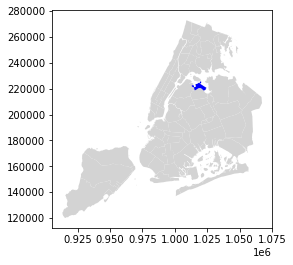

In [17]:
# ID and locate miscellaneous districts not in original dictionary

misc_districts = sorted([x for x in districts['BoroCD'].values if x not in list(cd_dict.keys())])

print(misc_districts)

fig, ax = plt.subplots()
districts.plot(ax=ax, color='lightgray')
districts[districts['BoroCD'] == 480].plot(ax=ax, color='blue');


In [13]:
# Name unnamed CDs (Joint Interest Areas)
# (info from 2010 Community District Geography Notes)

dict_2 = {164:'Central Park', 
          226: 'Van Cortlandt Park', 
          227: 'Bronx Park', 
          228: 'Pelham Bay Park', 
          355: 'Prospect Park', 
          356: 'Gateway National Park (BK)', 
          480: 'LaGuardia Airport', 
          481: 'Flushing Meadows Park', 
          482: 'Forest Park', 
          483: 'JFK Airport', 
          484: 'Gateway National Park (QN)', 
          595: 'Gateway National Park (SI)'
         }
#for (key, item) in dict_2.items():
    #cd_dict[key] = item

# Not adding these to dictionary because we do not have air quality information for these.
# Will leave these as nans to make easier to drop later if necessary.

In [14]:
districts['BoroCD_name'] = districts['BoroCD'].map(cd_dict)
districts[districts['BoroCD_name'].isnull()]

,BoroCD,Shape_Leng,Shape_Area,geometry,borough,BoroCD_name
6,483,106865.645248,1.919980e+08,"MULTIPOLYGON (((1054484.397 171656.027, 105448...",4,NaN
12,480,47208.379943,3.276353e+07,"POLYGON ((1022267.308 218659.533, 1022110.307 ...",4,NaN
15,228,118452.346622,9.282429e+07,"MULTIPOLYGON (((1046449.154 253110.227, 104644...",2,NaN
16,227,28390.986465,3.142850e+07,"POLYGON ((1020056.125 256149.857, 1020056.849 ...",2,NaN
19,355,23962.170251,2.614373e+07,"POLYGON ((994632.697 183968.715, 994641.086 18...",3,NaN
23,595,109772.581818,5.456528e+07,"MULTIPOLYGON (((970217.022 145643.332, 970227....",5,NaN
24,226,32820.429206,5.056599e+07,"POLYGON ((1020767.838 268271.133, 1020752.058 ...",2,NaN
29,164,32721.097665,3.831238e+07,"POLYGON ((998306.186 229602.999, 998253.743 22...",1,NaN
41,484,239254.065247,1.189881e+08,"MULTIPOLYGON (((1003083.647 142460.304, 100337...",4,NaN
50,482,31981.258319,2.425802e+07,"POLYGON ((1029743.612 198589.252, 1029798.405 ...",4,NaN


## Set up tree df as GeoDataFrame

In [15]:
# Set up GeoDataFrame
geometry = [Point(xy) for xy in zip(trees['longitude'], trees['latitude'])]
tree_gdf = gpd.GeoDataFrame(trees, geometry=geometry, crs="epsg:4326")

# Match CRS
tree_gdf.to_crs(epsg=2263, inplace=True)
tree_gdf.head()

,year,tree_diameter,Diameter_of_Stump_Measured,tree_status,tree_health_subjective,spc_latin,spc_common,sidw_damage,User_Type,Is_Root_Stone_Present,...,zip_code,borough,council_district,nta_name,census_tract_7dig,latitude,longitude,borough_name,alive,geometry
0,2015,3,0,Alive,Fair,Acer rubrum,red maple,0.0,TreesCount Staff,False,...,11375,4,29,Forest Hills,4073900,40.723092,-73.844215,Queens,1,POINT (1027431.148 202756.767)
1,2015,21,0,Alive,Fair,Quercus palustris,pin oak,1.0,TreesCount Staff,True,...,11357,4,19,Whitestone,4097300,40.794111,-73.818679,Queens,1,POINT (1034455.701 228644.838)
2,2015,3,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1.0,Volunteer,False,...,11211,3,34,East Williamsburg,3044900,40.717581,-73.936608,Brooklyn,1,POINT (1001822.833 200716.891)
3,2015,10,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1.0,Volunteer,True,...,11211,3,34,East Williamsburg,3044900,40.713537,-73.934456,Brooklyn,1,POINT (1002420.358 199244.251)
4,2015,21,0,Alive,Good,Tilia americana,American linden,1.0,Volunteer,True,...,11215,3,39,Park Slope-Gowanus,3016500,40.666778,-73.975979,Brooklyn,1,POINT (990913.776 182202.428)


## Initial plotting - check overlap

<AxesSubplot:>

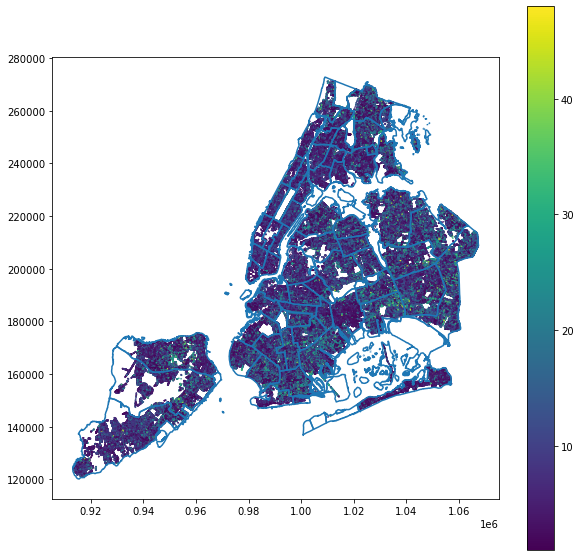

In [19]:
# Plot both gdfs together

fig, ax = plt.subplots(figsize=(10, 10))
tree_gdf.plot(column='tree_diameter', cmap='viridis', ax=ax, markersize=.5, legend=True, alpha=.8, vmin=1, vmax=48)
districts.boundary.plot(ax=ax)

<AxesSubplot:>

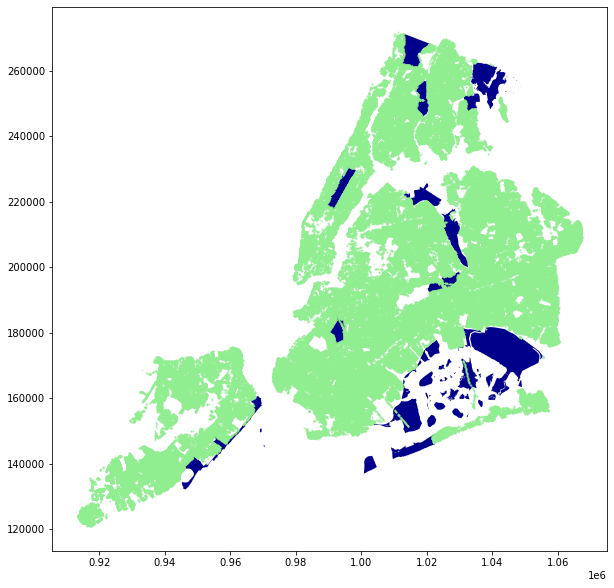

In [18]:
# It appears that the Join Interest Areas listed above were not meaningfully covered in the tree census.
# We may need to drop the trees that were counted in these areas later.
# Plot to observe:
fig, ax = plt.subplots(figsize=(10,10))
misc = districts[districts['BoroCD'].map(lambda x: x in misc_districts)]
misc.plot(ax=ax, color='darkblue')
tree_gdf.plot(ax=ax, color='lightgreen', markersize=.5, alpha=.4)

## Spatial Join to match trees to community districts

In [19]:
gdf = tree_gdf.sjoin(districts, how='left')

In [20]:
# Drop and rename columns
gdf.drop(columns=['index_right', 'census_tract_7dig', 'User_Type'], inplace=True)
gdf.rename(columns={'borough_left':'borough'}, inplace=True)

In [24]:
# How much data would we lose if we dropped joint interest areas?
jia_ind = gdf[gdf['BoroCD'].map(lambda x: x in misc_districts)].index
len(jia_ind)/gdf.shape[0]

0.0046701816299145205

In [25]:
# Drop Joint Interest Areas
gdf.drop(jia_ind, inplace=True)

In [88]:
gdf.columns

Index(['year', 'tree_diameter', 'Diameter_of_Stump_Measured', 'tree_status',
       'tree_health_subjective', 'spc_latin', 'spc_common', 'sidw_damage',
       'Is_Root_Stone_Present', 'Is_Root_Gate_Present',
       'Is_Root_Other_Present', 'Is_Trunk_Wire_Present',
       'Is_Trunk_Light_Present', 'Is_Trunk_Other_Present',
       'Is_Branch_Light_Present', 'Is_Branch_Sneaker_Present',
       'Is_Branch_Other_Present', 'est_address', 'zip_code', 'borough',
       'council_district', 'nta_name', 'latitude', 'longitude', 'borough_name',
       'alive', 'geometry', 'BoroCD', 'Shape_Leng', 'Shape_Area'],
      dtype='object')

### Check for missing values

In [100]:
# ID zip codes of missing CDs
print(gdf[gdf['BoroCD'].isnull()]['zip_code'].value_counts())

11362    28
11363    12
11001    11
11691     9
10464     4
10470     1
Name: zip_code, dtype: int64


In [40]:
# Fill missing CDs manually, using Google
missing = {11362: 411.0,
           11363: 411.0,
           11001: 413.0,
           11691: 414.0,
           10464: 210.0,
           10470: 212.0}
for row in gdf[gdf['BoroCD'].isnull()].index:
    zip_code = gdf.loc[row, 'zip_code']
    gdf.loc[row, 'BoroCD'] = missing[zip_code]

In [42]:
# Set BoroCD to integer
gdf['BoroCD'] = gdf['BoroCD'].astype(int)

In [53]:
# Boolean columns to int
bool_cols = [x for x in gdf.columns if gdf[x].dtype == 'bool']

gdf[bool_cols] = gdf[bool_cols].astype(int)

In [54]:
# Save this dataframe

keep_cols = ['year', 'tree_diameter', 'Diameter_of_Stump_Measured', 'tree_status',
       'tree_health_subjective', 'spc_latin', 'spc_common', 'sidw_damage',
       'Is_Root_Stone_Present', 'Is_Root_Gate_Present',
       'Is_Root_Other_Present', 'Is_Trunk_Wire_Present',
       'Is_Trunk_Light_Present', 'Is_Trunk_Other_Present',
       'Is_Branch_Light_Present', 'Is_Branch_Sneaker_Present',
       'Is_Branch_Other_Present', 'est_address', 'zip_code', 'borough', 'alive', 'BoroCD']
gdf.loc[:300000, keep_cols].to_csv('../data/tree_census/geo_trees_part1.csv')
gdf.loc[300001:, keep_cols].to_csv('../data/tree_census/geo_trees_part2.csv')

## Create District Summary DF

In [43]:
# Create DF with summary stats for each CD
tree_stats = gdf.groupby('BoroCD_name')[['BoroCD', 'borough', 'Shape_Area', 'tree_diameter', 'alive']].mean()

# Set numeric CD as index
tree_stats.reset_index(inplace=True)
tree_stats.set_index('BoroCD', inplace=True)

# Convert floats to integers
tree_stats.index = tree_stats.index.astype(int)
tree_stats['borough'] = tree_stats['borough'].astype(int)

# Rename columns
tree_stats.rename(columns={'tree_diameter': 'mean_tree_diam', 
                           'BoroCD_name': 'CD_name', 
                           'Shape_Area': 'CD_area'}, inplace=True)

# Add more columns
tree_stats['tree_count'] = gdf.groupby('BoroCD_name')['spc_common'].count().values
tree_stats['tree_density'] = tree_stats['tree_count'] / tree_stats['CD_area'] * 10**6
tree_stats['n_species'] = gdf.groupby('BoroCD_name')['spc_latin'].nunique().values

In [45]:
tree_stats.head()

,CD_name,borough,CD_area,mean_tree_diam,alive,tree_count,tree_density,n_species
BoroCD,,,,,,,,
310,Bay Ridge and Dyker Heights (CD10),3,1.113457e+08,13.977268,0.955308,9062,81.386145,107
411,Bayside and Little Neck (CD11),4,2.603629e+08,14.125527,0.958932,23230,89.221608,128
303,Bedford Stuyvesant (CD3),3,7.946150e+07,10.315858,0.969856,6104,76.817073,104
206,Belmont and East Tremont (CD6),2,4.266431e+07,7.264135,0.949367,3555,83.324912,101
311,Bensonhurst (CD11),3,1.032108e+08,13.350786,0.964307,8461,81.977886,114


In [46]:
tree_stats['tree_count'].describe()

count       59.000000
mean      9578.661017
std       8645.630351
min       1132.000000
25%       4146.500000
50%       6302.000000
75%      10302.500000
max      48933.000000
Name: tree_count, dtype: float64

In [48]:
tree_stats.shape[0], districts.shape[0]

(59, 71)

In [49]:
# Combine this df with districts df in order to map w/ summary stats

cd_stats = pd.merge(tree_stats, districts, left_on='BoroCD', right_on='BoroCD', copy=False)
cd_stats.rename(columns = {'borough_x': 'borough'}, inplace=True)

In [50]:
tree_stats.to_csv('../data/tree_census/tree_summary_by_cd.csv')
cd_stats.to_csv('../data/tree_census/tree_summary_with_geometry.csv')

In [51]:
cd_stats.shape

(59, 14)

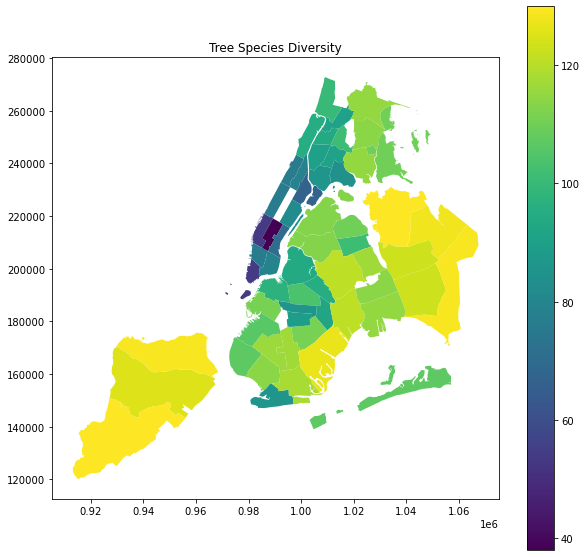

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Tree Species Diversity')
cd_stats.plot(ax=ax, column='n_species', vmin=cd_stats['n_species'].min(), vmax=cd_stats['n_species'].max(), legend=True);

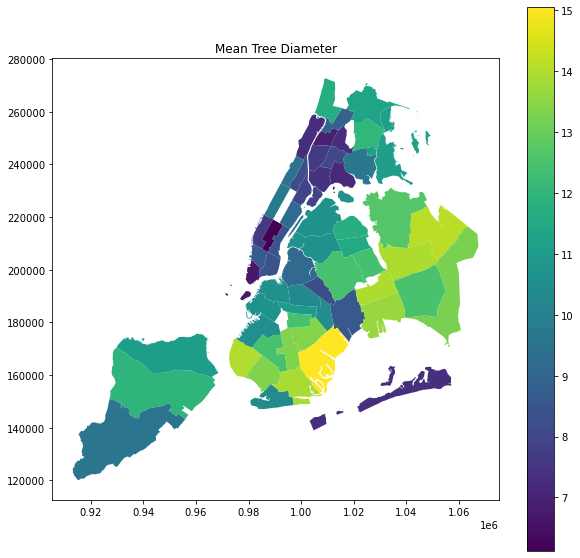

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Mean Tree Diameter')
cd_stats.plot(ax=ax, column='mean_tree_diam', vmin=cd_stats['mean_tree_diam'].min(), vmax=cd_stats['mean_tree_diam'].max(), legend=True);

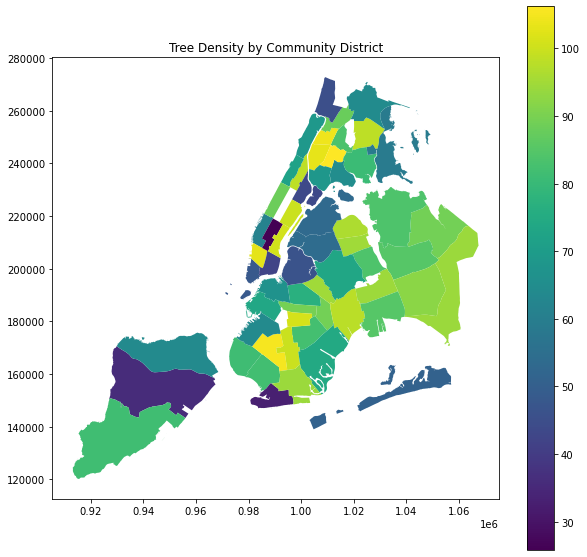

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Tree Density by Community District')
cd_stats.plot(ax=ax, column='tree_density', vmin=cd_stats['tree_density'].min(), vmax=cd_stats['tree_density'].max(), legend=True);


In [71]:
trees['alive'].value_counts(normalize=True)

1    0.953679
0    0.046321
Name: alive, dtype: float64